In [1]:
import pandas as pd
import sklearn.model_selection as ms
import sklearn.metrics as me
import xgboost as xgb

In [2]:
RANDOM_STATE = 42

In [29]:
ranked = pd.read_csv("../Data/files/flights_subspace_rank.csv")
ranked_test = pd.read_csv("../Data/files/flights_test_rank.csv")
stats = pd.read_csv("../Data/files/flights_subspace_stats.csv")
stats_test = pd.read_csv("../Data/files/flights_test_stats.csv")

In [4]:
# data sampling
rank_sample = ranked.sample(frac=0.15, random_state=RANDOM_STATE)
stats_sample = stats.sample(frac=0.15, random_state=RANDOM_STATE)

In [5]:
rfc = xgb.XGBRFClassifier(use_label_encoder=False, random_state=RANDOM_STATE)

In [6]:
dfs = (ranked, stats)

# binarize the arr_delay feature and drop it.
for df in dfs:
    df['is_delayed'] = df['arr_delay'].apply(lambda delay: 1 if (delay > 0) else 0)

In [7]:
X_rank, y_rank = ranked.drop(columns=['fl_date', 'arr_delay', 'is_delayed']), ranked.is_delayed
X_stats, y_stats = stats.drop(columns=['fl_date', 'arr_delay', 'is_delayed']), stats.is_delayed

In [8]:
rank_Xtrain, rank_Xtest, rank_ytrain, rank_ytest = ms.train_test_split(X_rank, y_rank, stratify=y_rank, test_size=0.3, random_state=RANDOM_STATE)
stats_Xtrain, stats_Xtest, stats_ytrain, stats_ytest = ms.train_test_split(X_stats, y_stats, stratify=y_stats, test_size=0.3, random_state=RANDOM_STATE)

### Ranked data

In [9]:
rfc.fit(rank_Xtrain, rank_ytrain)
rank_pred = rfc.predict(rank_Xtest)

[12:15:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [10]:
soft_from_rank = rfc.predict_proba(rank_Xtest)

In [11]:
print(me.classification_report(rank_ytest, rank_pred))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78    455787
           1       0.55      0.11      0.18    246202

    accuracy                           0.66    701989
   macro avg       0.61      0.53      0.48    701989
weighted avg       0.62      0.66      0.57    701989



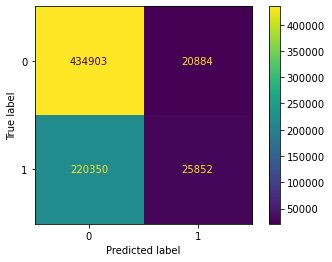

In [12]:
me.ConfusionMatrixDisplay.from_predictions(rank_ytest, rank_pred)

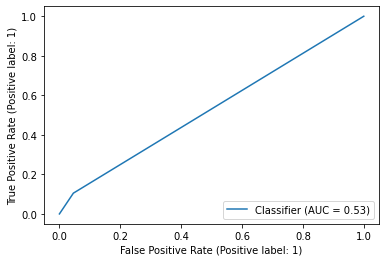

In [13]:
me.RocCurveDisplay.from_predictions(rank_ytest, rank_pred)

### Stats data

In [14]:
rfc.fit(stats_Xtrain, stats_ytrain)
stats_pred = rfc.predict(stats_Xtest)

[12:17:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [15]:
soft_from_stats = rfc.predict_proba(stats_Xtest)

In [16]:
print(me.classification_report(stats_ytest, stats_pred))

              precision    recall  f1-score   support

           0       0.66      0.97      0.79    455787
           1       0.57      0.09      0.15    246202

    accuracy                           0.66    701989
   macro avg       0.62      0.53      0.47    701989
weighted avg       0.63      0.66      0.56    701989



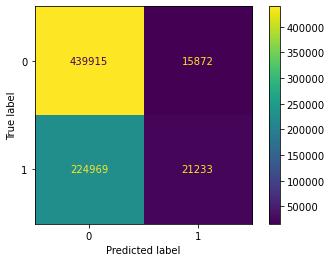

In [17]:
me.ConfusionMatrixDisplay.from_predictions(stats_ytest, stats_pred)

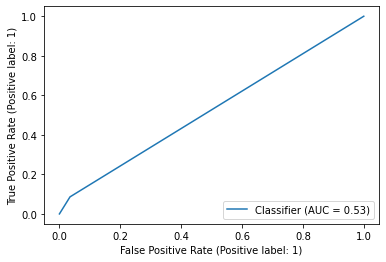

In [18]:
me.RocCurveDisplay.from_predictions(stats_ytest, stats_pred)

### Predictions

In [30]:
rank_ = soft_from_rank[:, :1]
stats_ = soft_from_stats[:, :1]

In [31]:
ranked['stats_pred'] = pd.Series(stats_.reshape(-1))
ranked['rank_pred'] = pd.Series(rank.reshape(-1))

ranked_test['stats_pred'] = pd.Series(stats_.reshape(-1))
ranked_test['rank_pred'] = pd.Series(rank.reshape(-1))

stats['stats_pred'] = pd.Series(stats_.reshape(-1))
stats['rank_pred'] = pd.Series(rank.reshape(-1))

stats_test['stats_pred'] = pd.Series(stats_.reshape(-1))
stats_test['rank_pred'] = pd.Series(rank.reshape(-1))

In [32]:
ranked.head()

,fl_date,branded_code_share,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,arr_delay,origin_airport_id_rank,dest_airport_id_rank,month_of_year_rank,day_of_week_rank,week_of_year_rank,tail_num_rank,op_unique_carrier_rank,mkt_unique_carrier_rank,stats_pred,rank_pred
0,2019-05-19,1,1020,1112,52.0,127,-2.0,205.0,62.0,8.0,4.0,45.0,5064.0,25.0,9.0,0.631957,0.609056
1,2019-05-19,1,1148,1340,112.0,468,-14.0,194.0,196.0,8.0,4.0,45.0,3880.0,25.0,9.0,0.722451,0.718215
2,2019-05-19,1,1155,1551,176.0,1091,4.0,205.0,235.0,8.0,4.0,45.0,4949.0,25.0,9.0,0.767367,0.755462
3,2019-05-19,1,839,959,80.0,310,-20.0,138.0,182.0,8.0,4.0,45.0,5912.0,25.0,9.0,0.677146,0.684658
4,2019-05-19,1,710,826,76.0,301,-1.0,290.0,196.0,8.0,4.0,45.0,5745.0,25.0,9.0,0.736123,0.714589


In [33]:
ranked_test.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,origin,dest_airport_id,...,origin_airport_id_rank,dest_airport_id_rank,month_of_year_rank,day_of_week_rank,week_of_year_rank,tail_num_rank,op_unique_carrier_rank,mkt_unique_carrier_rank,stats_pred,rank_pred
0,2020-01-01 00:00:00,WN,0,WN,5888,WN,N951WN,13891,ONT,14771,...,92.0,324.0,5.0,2.0,35.0,2275.0,8.0,5.0,0.631957,0.609056
1,2020-01-01 00:00:00,WN,0,WN,6276,WN,N467WN,13891,ONT,14771,...,92.0,324.0,5.0,2.0,35.0,1628.0,8.0,5.0,0.722451,0.718215
2,2020-01-01 00:00:00,WN,0,WN,4598,WN,N7885A,13891,ONT,14831,...,92.0,79.0,5.0,2.0,35.0,2673.0,8.0,5.0,0.767367,0.755462
3,2020-01-01 00:00:00,WN,0,WN,4761,WN,N551WN,13891,ONT,14831,...,92.0,79.0,5.0,2.0,35.0,2991.0,8.0,5.0,0.677146,0.684658
4,2020-01-01 00:00:00,WN,0,WN,5162,WN,N968WN,13891,ONT,14831,...,92.0,79.0,5.0,2.0,35.0,2108.0,8.0,5.0,0.736123,0.714589


In [34]:
# Uncomment to save

# ranked.to_csv("../Data/files/rank.csv", index=False)
# ranked_test.to_csv("../Data/files/rank_test.csv", index=False)
# stats.to_csv("../Data/files/stats.csv", index=False)
# stats_test.to_csv("../Data/files/stats_test.csv", index=False)